In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import ccxt

# Set the symbol for Tether to Bitcoin
symbol = 'BTC/USDT'

# Create a Binance API object
exchange = ccxt.binance()

# Define the timeframe (e.g., '1d' for daily)
timeframe = '1d'

# Set the start and end timestamps
start_timestamp = pd.Timestamp('2018-01-01')
end_timestamp = pd.Timestamp('2022-12-31')

# Initialize an empty DataFrame to store the data
all_data = pd.DataFrame()

# Define the chunk size (number of days per request)
chunk_size = 30

# Fetch historical OHLCV (Open, High, Low, Close, Volume) data in chunks
while start_timestamp < end_timestamp:
    # Calculate the end timestamp for the current chunk
    chunk_end_timestamp = min(start_timestamp + pd.Timedelta(days=chunk_size), end_timestamp)

    # Fetch data for the current chunk
    chunk_ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=int(start_timestamp.timestamp()) * 1000)

    # Convert the data to a DataFrame
    chunk_data = pd.DataFrame(chunk_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

    # Convert timestamp to datetime
    chunk_data['timestamp'] = pd.to_datetime(chunk_data['timestamp'], unit='ms')

    # Concatenate the current chunk to the overall data
    all_data = pd.concat([all_data, chunk_data])

    # Update the start timestamp for the next iteration
    start_timestamp = chunk_end_timestamp

# Set the timestamp as the index
all_data.set_index('timestamp', inplace=True)

# Filter the DataFrame to the desired date range
data = all_data[(all_data.index >= pd.Timestamp('2018-01-01')) & (all_data.index < pd.Timestamp('2022-01-31'))]
data_test = all_data[(all_data.index >= pd.Timestamp('2022-02-01')) & (all_data.index < pd.Timestamp('2022-12-31'))]

# Display the first few rows of the dataset for inspection
print(data.head())



                open      high       low     close        volume
timestamp                                                       
2018-01-01  13715.65  13818.55  12750.00  13380.00   8609.915844
2018-01-02  13382.16  15473.49  12890.02  14675.11  20078.092111
2018-01-03  14690.00  15307.56  14150.00  14919.51  15905.667639
2018-01-04  14919.51  15280.00  13918.04  15059.54  21329.649574
2018-01-05  15059.56  17176.24  14600.00  16960.39  23251.491125


In [2]:
X_features = ['open', "volume"]
target_column = 'close'

# Extract features (X_train) and target (y_train)
X_train = data[X_features]
y_train = data[target_column]

# Split the data into training and testing sets
X_test = data_test[X_features]
y_test = data_test[target_column]

# Display the shape of the training and testing sets
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (20936, 2)
Shape of X_test: (5548, 2)
Shape of y_train: (20936,)
Shape of y_test: (5548,)


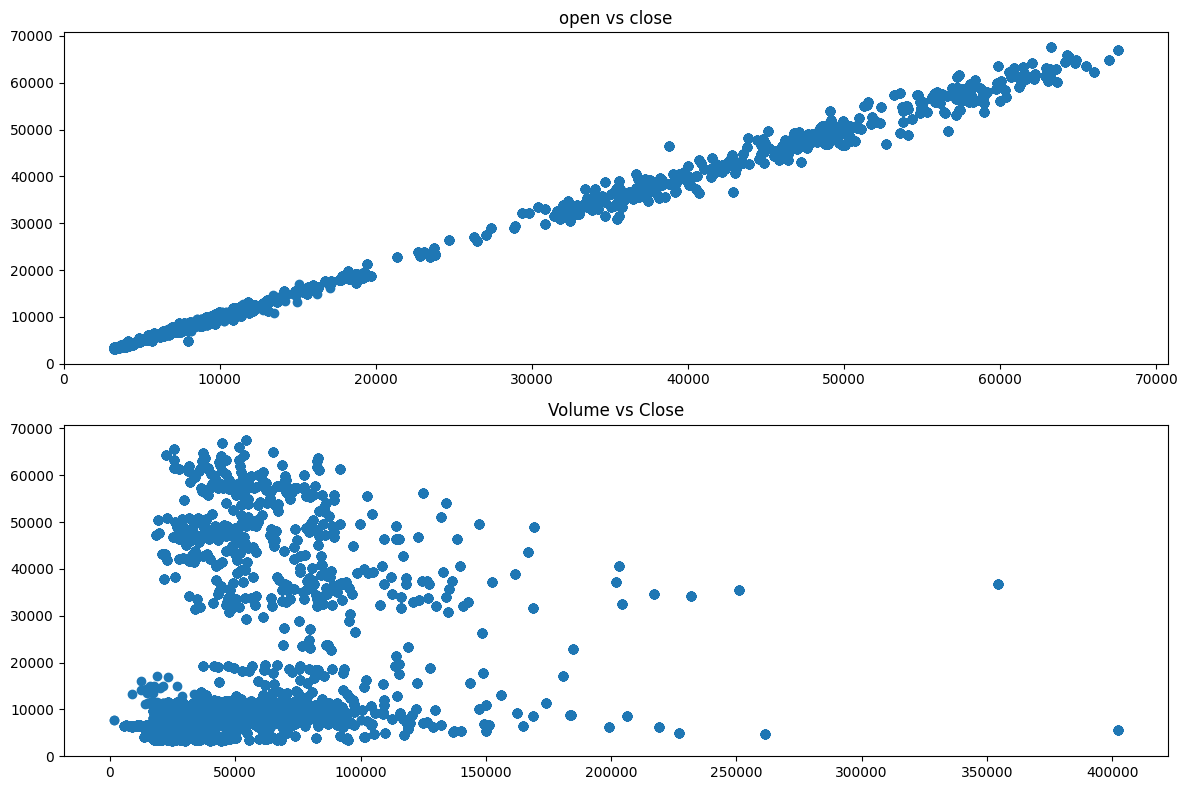

In [3]:
fig, axs = plt.subplots(2, figsize=(12, 8))

axs[0].scatter(X_train['open'], y_train)
axs[0].set_title('open vs close')

axs[1].scatter(X_train['volume'], y_train)
axs[1].set_title('Volume vs Close')

plt.tight_layout()
plt.show()

In [4]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [5]:
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w}, b = {b}")

w = [ 0.99891639 -0.00194654], b = 159.61109172599754


Training MSE: 1049586.5283646071


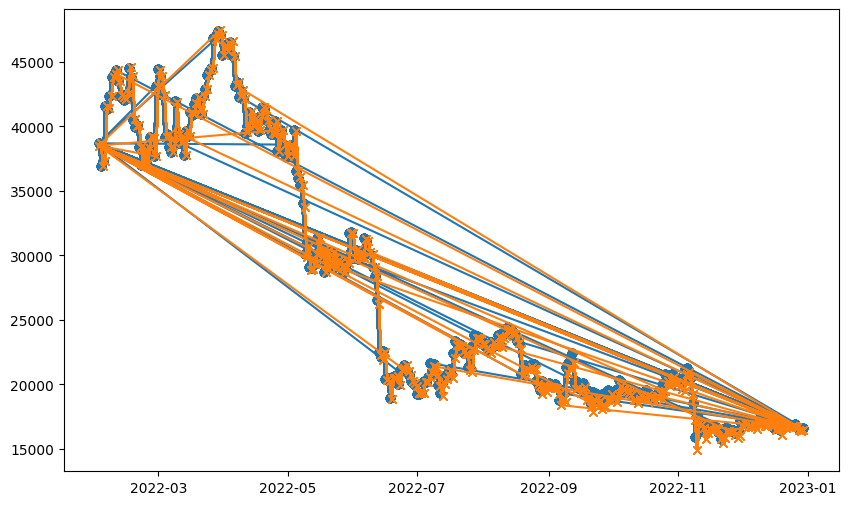

In [6]:
from sklearn.metrics import mean_squared_error

predictions = linear_model.predict(X_test).tolist()

time_column =data_test.index.tolist()

# Plotting the actual values
plt.figure(figsize=(10, 6))
plt.plot(time_column,y_test, label='Actual', marker='o')

# Plotting the predicted values
plt.plot(time_column,predictions, label='Predicted', marker='x')


train_mse = mean_squared_error(y_test, predictions)
print(f"Training MSE: {train_mse}")
plt.show()